# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
# Set lists to search for
search_cities = []
search_countries = []
search_date = []
search_lat = []
search_lng = []
search_max_temp = []
search_humidity = []
search_wind = []
search_clouds = []

# Setting up counters
index_counter = 0
set_counter = 1

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("<____Beginning Data Retrieval____>")


#loop to get information for each city
for city in cities:

    response = requests.get(query_url + city).json()
    
    
    try:           
#         print("Processing Record Search: " + city)
        search_cities.append(response["name"])
        search_countries.append(response["sys"]["country"])
        search_date.append(response["dt"])
        search_lat.append(response["coord"]["lat"])
        search_lng.append(response["coord"]["lon"])
        search_max_temp.append(response["main"]["temp_max"])
        search_humidity.append(response["main"]["humidity"])
        search_wind.append(response["wind"]["speed"])
        search_clouds.append(response["clouds"]["all"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except:
        print("City not found. Skipping...")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")
        

<____Beginning Data Retrieval____>
Processing Record 1 of Set 1 : cape town
Processing Record 2 of Set 1 : safaga
Processing Record 3 of Set 1 : atuona
Processing Record 4 of Set 1 : faya
Processing Record 5 of Set 1 : bluff
Processing Record 6 of Set 1 : marienburg
Processing Record 7 of Set 1 : norman wells
Processing Record 8 of Set 1 : qaqortoq
Processing Record 9 of Set 1 : thompson
Processing Record 10 of Set 1 : kupang
Processing Record 11 of Set 1 : hobart
City not found. Skipping...
Processing Record 12 of Set 1 : albany
Processing Record 13 of Set 1 : miri
Processing Record 14 of Set 1 : bambous virieux
Processing Record 15 of Set 1 : dingle
Processing Record 16 of Set 1 : bud
Processing Record 17 of Set 1 : mataura
Processing Record 18 of Set 1 : half moon bay
Processing Record 19 of Set 1 : arraial do cabo
Processing Record 20 of Set 1 : leh
Processing Record 21 of Set 1 : davila
Processing Record 22 of Set 1 : luderitz
Processing Record 23 of Set 1 : lompoc
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
# Store raw data in weather_data dict
weather_data = {
                "City": search_cities,
                "Lat": search_lat, 
                "Lng": search_lng,
                "Max Temp": search_max_temp,
                "Humidity": search_humidity,
                "Cloudiness": search_clouds, 
                "Wind Speed": search_wind,
                "Country": search_countries, 
                "Date": search_date                 
}

# pd.DataFrame.from_dict(weather_data, orient='index')
# # Make dict to data frame
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,22.00,49,40,6.17,ZA,1613903406
1,Safaga,26.7292,33.9365,19.00,34,0,4.12,EG,1613903603
2,Atuona,-9.8000,-139.0333,26.33,79,85,8.73,PF,1613903603
3,Faya,18.3851,42.4509,18.00,67,40,9.77,SA,1613903603
4,Bluff,-46.6000,168.3333,15.00,84,0,0.89,NZ,1613903603


In [118]:
# Save data into a csv file
weather_df.to_csv("../output_data/weather_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [119]:
# Check if there are cities with humidity > 100%
weather_df.loc[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

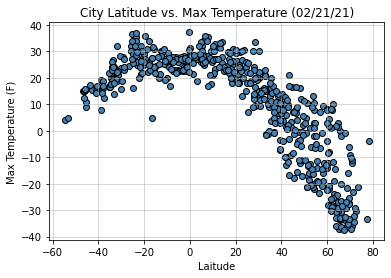

In [121]:
# Plot the scatter graph
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Format the plot
plt.title("City Latitude vs. Max Temperature (02/21/21)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plot
plt.savefig("../Images/Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

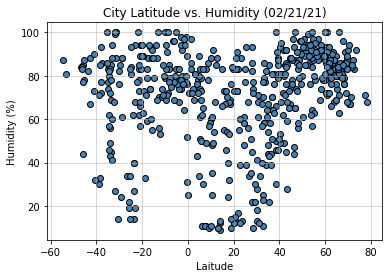

In [122]:
# Plot the scatter graph
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Format the plot
plt.title("City Latitude vs. Humidity (02/21/21)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plot
plt.savefig("../Images/Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

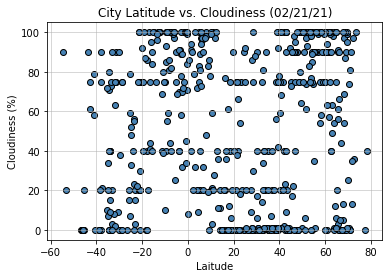

In [124]:
# Plot the scatter graph
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Format the plot
plt.title("City Latitude vs. Cloudiness (02/21/21)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plot
plt.savefig("../Images/Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

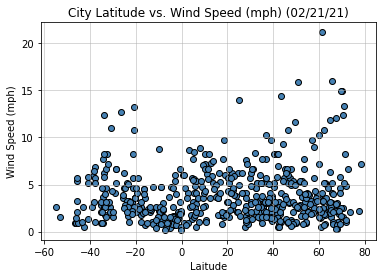

In [128]:
# Plot the scatter graph
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Format the plot
plt.title("City Latitude vs. Wind Speed (mph) (02/21/21)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plot
plt.savefig("../Images/Latitude vs Wind Speed.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [145]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

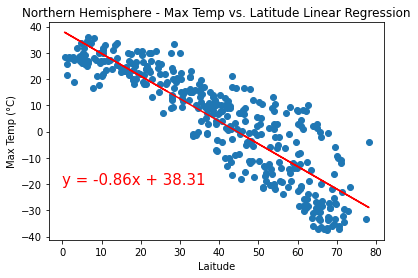

In [163]:
# Plot the scatter graph
plt.scatter(north_hemi["Lat"], north_hemi["Max Temp"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Max Temp"])    
regression_values = north_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(north_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(0,-20), fontsize=15, color='red')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Max Temp (°C)")

# Save the plot
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

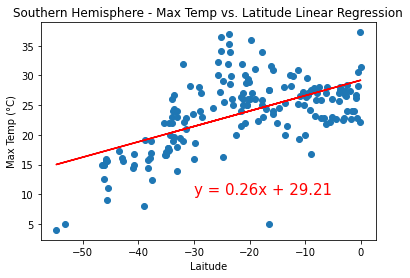

In [164]:
# Plot the scatter graph
plt.scatter(south_hemi["Lat"], south_hemi["Max Temp"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Max Temp"])    
regression_values = south_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(south_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(-30,10), fontsize=15, color='red')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Max Temp (°C)")

# Save the plot
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

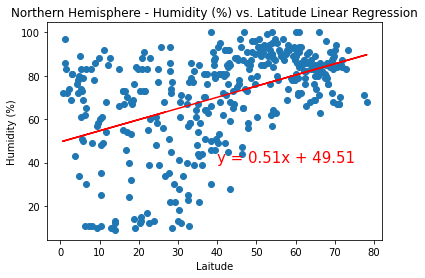

In [165]:
# Plot the scatter graph
plt.scatter(north_hemi["Lat"], north_hemi["Humidity"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Humidity"])    
regression_values = north_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(north_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(40,40), fontsize=15, color='red')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Save the plot
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

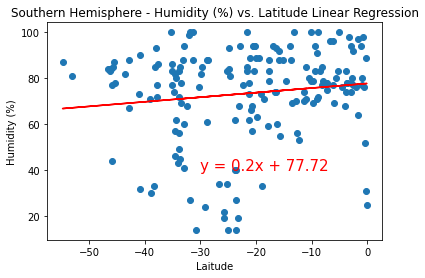

In [166]:
# Plot the scatter graph
plt.scatter(south_hemi["Lat"], south_hemi["Humidity"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Humidity"])    
regression_values = south_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(south_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(-30,40), fontsize=15, color='red')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Save the plot
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

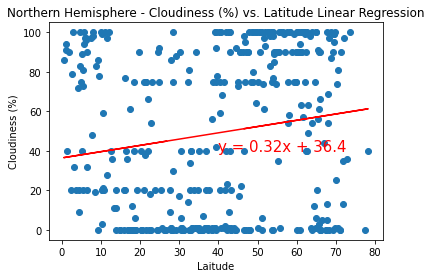

In [167]:
# Plot the scatter graph
plt.scatter(north_hemi["Lat"], north_hemi["Cloudiness"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Cloudiness"])    
regression_values = north_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(north_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(40,40), fontsize=15, color='red')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Save the plot
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

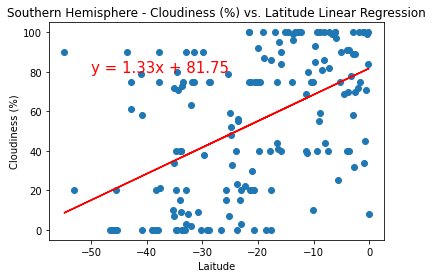

In [168]:
# Plot the scatter graph
plt.scatter(south_hemi["Lat"], south_hemi["Cloudiness"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Cloudiness"])    
regression_values = south_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(south_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(-50,80), fontsize=15, color='red')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Save the plot
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

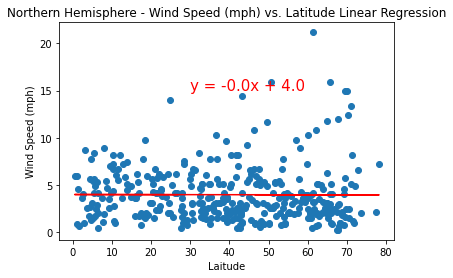

In [171]:
# Plot the scatter graph
plt.scatter(north_hemi["Lat"], north_hemi["Wind Speed"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Wind Speed"])    
regression_values = north_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(north_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(30,15), fontsize=15, color='red')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")

# Save the plot
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

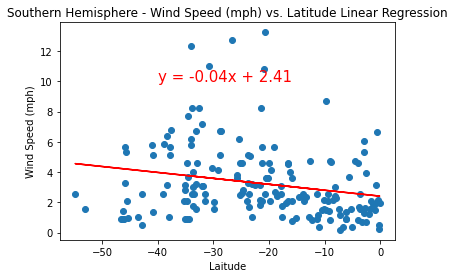

In [174]:
# Plot the scatter graph
plt.scatter(south_hemi["Lat"], south_hemi["Wind Speed"])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Wind Speed"])    
regression_values = south_hemi["Lat"] * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format the plot
plt.plot(south_hemi["Lat"],regression_values,'r-')  
plt.annotate(line_equation,(-40,10), fontsize=15, color='red')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")

# Save the plot
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")